## Подключение библиотек

In [34]:
# pip install fitz


In [35]:
# pip install PyMuPDF


In [36]:
# pip install pymupdf pandas tqdm

In [37]:
# pip install --upgrade gensim scipy

In [38]:
# pip install pymorphy3

In [39]:
# pip install WordCloud

In [40]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [41]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')  # Загружаем токенизатор Punkt
from nltk.corpus import stopwords

In [42]:
df_habr = pd.read_csv("MyHabrCsv.csv")

In [43]:
df_json = pd.read_csv("parsJson.csv")

In [44]:
df_pdf = pd.read_csv("parsing_pdf_csv.csv")

In [45]:
df_habr.head()

Unnamed: 0                                              title  \
0           0  Издержки микросервисов, которые ваш стартап мо...   
1           1  Тяжеловесы, которые не взлетели: 5 проваливших...   
2           2                               Что вы знаете о Яве?   
3           3  Перешагивая через века. Rise of nations: Thron...   
4           4  Деньги и автономия — ситуация в сфере баз данн...   

     namecompany                                      description  rating  \
0      RUVDS.com       VDS/VPS-хостинг. Скидка 15% по коду HABR15       0   
1            МТС                        Про жизнь и развитие в IT       0   
2      Axiom JDK                      на страже безопасности Java       0   
3  Timeweb Cloud                                  То самое облако       0   
4    VAS Experts  Разработчик платформы глубокого анализа трафика       0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-05-18   
1  Связь и телекоммуникации, Мобильные технологии...  2025-05-18   
2  Программное обеспечение, Консалтинг и поддержк...  2025-05-18   
3                           Связь и телекоммуникации  2025-05-17   
4  Программное обеспечение, Аппаратное обеспечени...  2025-05-17   

                                             textpub  
0    Выживание стартапа зависит от того, наскольк...  
1  Привет, Хабр! Меня зовут Настя, я автор команд...  
2  23 мая этого года языку Java исполняется 30 ле...  
3  Так-так-так... что это здесь у нас? Мои глаза ...  
4  Недавно в США задумались о сокращении финансир...

In [46]:
df_habr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   88 non-null     int64 
 1   title        88 non-null     object
 2   namecompany  88 non-null     object
 3   description  88 non-null     object
 4   rating       88 non-null     int64 
 5   field        88 non-null     object
 6   date         88 non-null     object
 7   textpub      88 non-null     object
dtypes: int64(2), object(6)
memory usage: 5.6+ KB


In [47]:
df_json.head()

text             date  rate  \
0  7 декабря состоялась церемония награждения лау...  8 декабря 09:30   6.0   
1  7 декабря состоялась церемония награждения лау...  8 декабря 09:30   6.0   
2  Из совместного исследования издателя компьютер...    29 июля 13:50  12.0   
3  По статистике The Esports Observer за I полови...     9 июля 09:33  18.0   
4  Компании SuperData Research и PayPal провели с...  11 апреля 12:43  11.0   

     views               file_name  
0   2300.0  Cybersport.Metaratings  
1   2300.0         ESforce Holding  
2   2800.0         ESforce Holding  
3   6200.0         ESforce Holding  
4  10000.0         ESforce Holding

In [48]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       1112 non-null   object 
 1   date       1112 non-null   object 
 2   rate       1112 non-null   float64
 3   views      1112 non-null   float64
 4   file_name  1112 non-null   object 
dtypes: float64(2), object(3)
memory usage: 43.6+ KB


In [49]:
df_pdf.head()

file_name  \
0  AI-агенты в реальном мире_ почему они не работ...   
1  Cocoapods, Carthage, SPM как выбрать менеджер ...   
2  Deutsche Telekom и Perplexity объявили о новом...   
3              imgonline-com-ua-site2pdfB28eKGLy6EjA   
4  OSINT & Hacking — как работает фишинг для нель...   

                                               title         author  \
0  Меня з овут Алек сандр, я COO в SaaS-пла тформ...           Kual   
1                                             117.94    redmadrobot   
2  Еще до на чала MWC в Барсе лоне был о очевидно...  technokratiya   
3                                              71.07            NaN   
4                                              71.07            NaN   

                                                tags  \
0  ai-агент, llm-мо дели, llm, инженерия наде жно...   
1                                      red_mad_robot   
2  смар тфоны, ии, искусственный инт еллек т, моб...   
3                                              взлом   
4                                              взлом   

                                                hubs  \
0  Искусственный инт еллек т, Управ ление ра зраб...   
1                        Блог компании red_mad_robot   
2              Искусственный инт еллек т, Смар тфоны   
3                              Блог компании Cloud4Y   
4                              Блог компании Cloud4Y   

                                             content  char_count  word_count  
0  Интерес к аг ентам прояв ляется со всех сторон...       29018        5384  
1  менеджер зависимостей в iOS\n179\nБлог компани...       27968        3696  
2  стоимостью  менее  1 000  долларов\n4 мин 419\...        6675        1278  
3  Cloud4Y\n5 часов назад\nOSINT & Hacking — как ...        5034         710  
4  5 часов назад\nПростой\n3 мин\nCloud4Y\nOSINT ...        4997         704

In [50]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   25 non-null     object
 1   title       25 non-null     object
 2   author      15 non-null     object
 3   tags        22 non-null     object
 4   hubs        22 non-null     object
 5   content     25 non-null     object
 6   char_count  25 non-null     int64 
 7   word_count  25 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 1.7+ KB


### Объединяем датасеты

In [52]:
# переименовываем столбцы
df_habr = df_habr.rename(columns={'textpub': 'text'})
df_pdf = df_pdf.rename(columns={'content': 'text'})

In [53]:
# Объединяем датасеты, сохраняя только 'id' и 'text'
df = pd.concat([
    df_habr[['text']],
    df_json[['text']],
    df_pdf[['text']]
], ignore_index=True)

df.insert(0, 'id', range(len(df)))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1225 non-null   int64 
 1   text    1225 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


In [55]:
df.head()

id                                               text
0   0    Выживание стартапа зависит от того, наскольк...
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...
2   2  23 мая этого года языку Java исполняется 30 ле...
3   3  Так-так-так... что это здесь у нас? Мои глаза ...
4   4  Недавно в США задумались о сокращении финансир...

## Предварительная обработка данных

1.  Удаление ненужных символов
2.1 Удаление стоп слов
2.2 Токенизация по словам
3.  Стемминг (приведение слов к нормальной форме)
4.  Лемматизация
5.  Облако слов
6.  Векторизация

### 1. Удаление ненужных символов

In [59]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = ' ▍💻'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [60]:
df['prep_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['text']]

In [61]:
df.head()

id                                               text  \
0   0    Выживание стартапа зависит от того, наскольк...   
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...   
2   2  23 мая этого года языку Java исполняется 30 ле...   
3   3  Так-так-так... что это здесь у нас? Мои глаза ...   
4   4  Недавно в США задумались о сокращении финансир...   

                                           prep_text  
0   выживание стартапа зависит от того насколько ...  
1  привет хабр меня зовут настя я автор команды т...  
2   мая этого года языку java исполняется лет в ч...  
3  так так так что это здесь у нас мои глаза с лю...  
4  недавно в сша задумались о сокращении финансир...

In [62]:
df['text'][0]

'  Выживание стартапа зависит от того, насколько быстро вы сможете вносить доработки, поставлять новые функции и обеспечивать ценность для конечных потребителей. И во всём этом важную роль играет выбранная вами базовая архитектура. Кроме того, оперативность команды напрямую зависит от технологического стека и используемого языка программирования. Неудачная архитектура, особенно на базе незрелых микросервисов, может сильно подорвать продуктивность и привести к срыву планов по выпуску продукта.  Я усвоил всё это, когда работал над новаторскими проектами в начинающих стартапах, где в качестве программной архитектуры выбирались сомнительные решения, которые вели к недоделанным сервисам и хрупким, перемудрёным локальным конфигурациям, а также подрывали дух разработчиков, которые не тянули излишнюю сложность.  Ну и прежде чем описывать подводные камни такого решения, уточню, на что конкретно вы подписываетесь, когда слишком рано переходите на микросервисы:    Слабое место Как проявляется Пос

In [63]:
df['prep_text'][0]

' выживание стартапа зависит от того насколько быстро вы сможете вносить доработки поставлять новые функции и обеспечивать ценность для конечных потребителей и во всём этом важную роль играет выбранная вами базовая архитектура кроме того оперативность команды напрямую зависит от технологического стека и используемого языка программирования неудачная архитектура особенно на базе незрелых микросервисов может сильно подорвать продуктивность и привести к срыву планов по выпуску продукта я усвоил всё это когда работал над новаторскими проектами в начинающих стартапах где в качестве программной архитектуры выбирались сомнительные решения которые вели к недоделанным сервисам и хрупким перемудрёным локальным конфигурациям а также подрывали дух разработчиков которые не тянули излишнюю сложность ну и прежде чем описывать подводные камни такого решения уточню на что конкретно вы подписываетесь когда слишком рано переходите на микросервисы слабое место как проявляется последствия для разработчика 

In [64]:
russian_stopwords = stopwords.words("russian") 

In [65]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [66]:
russian_stopwords.extend(['это','который', 'свой', 'также', 'просто', 'наш', 'поэтому']) 

### 2. Удаление стоп-слов и токенизация по словам

In [68]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [69]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [70]:
df.head()

id                                               text  \
0   0    Выживание стартапа зависит от того, наскольк...   
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...   
2   2  23 мая этого года языку Java исполняется 30 ле...   
3   3  Так-так-так... что это здесь у нас? Мои глаза ...   
4   4  Недавно в США задумались о сокращении финансир...   

                                           prep_text  \
0   выживание стартапа зависит от того насколько ...   
1  привет хабр меня зовут настя я автор команды т...   
2   мая этого года языку java исполняется лет в ч...   
3  так так так что это здесь у нас мои глаза с лю...   
4  недавно в сша задумались о сокращении финансир...   

                                       tokenize_text  
0  выживание стартапа зависит насколько быстро см...  
1  привет хабр зовут настя автор команды техпиара...  
2  мая года языку java исполняется лет честь круг...  
3  мои глаза любопытством смешанным сомнением нач...  
4  недавно сша задумались сокращении финансирован...

### Стемминг

In [72]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [73]:
df.head()

id                                               text  \
0   0    Выживание стартапа зависит от того, наскольк...   
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...   
2   2  23 мая этого года языку Java исполняется 30 ле...   
3   3  Так-так-так... что это здесь у нас? Мои глаза ...   
4   4  Недавно в США задумались о сокращении финансир...   

                                           prep_text  \
0   выживание стартапа зависит от того насколько ...   
1  привет хабр меня зовут настя я автор команды т...   
2   мая этого года языку java исполняется лет в ч...   
3  так так так что это здесь у нас мои глаза с лю...   
4  недавно в сша задумались о сокращении финансир...   

                                       tokenize_text  \
0  выживание стартапа зависит насколько быстро см...   
1  привет хабр зовут настя автор команды техпиара...   
2  мая года языку java исполняется лет честь круг...   
3  мои глаза любопытством смешанным сомнением нач...   
4  недавно сша задумались сокращении финансирован...   

                                           text_stem  
0  выживан стартап завис наскольк быстр сможет вн...  
1  привет хабр зовут наст автор команд техпиар мт...  
2  ма год язык java исполня лет чест кругл дат ко...  
3  мо глаз любопытств смеша сомнен нача осмотр мн...  
4  недавн сша задума сокращен финансирован cve гл...

In [74]:
df['text_stem'][0]

'выживан стартап завис наскольк быстр сможет внос доработк поставля нов функц обеспечива ценност конечн потребител всем важн рол игра выбра вам базов архитектур кром оперативн команд напрям завис технологическ стек используем язык программирован неудачн архитектур особен баз незрел микросервис сильн подорва продуктивн привест срыв план выпуск продукт усво все работа новаторск проект начина стартап качеств программн архитектур выбира сомнительн решен котор вел недодела сервис хрупк перемудрен локальн конфигурац подрыва дух разработчик котор тянул излишн сложност прежд описыва подводн камн так решен уточн конкретн подписыва слишк ран переход микросервис слаб мест проявля последств разработчик сложност развертыван необходим оркестрирова сервис работ одн функц лишн час работ кажд релиз хрупкост локальн разработк расползан docker слома скрипт платформ зависим медлен онбординг част сбо дубликац ci cd нескольк пайплайн повторя логик дополнительн плат кажд сервис связыван сервис « разделен » с

### Лемматизация

In [76]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [77]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 2min 13s
Wall time: 2min 14s


In [78]:
df.head()

id                                               text  \
0   0    Выживание стартапа зависит от того, наскольк...   
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...   
2   2  23 мая этого года языку Java исполняется 30 ле...   
3   3  Так-так-так... что это здесь у нас? Мои глаза ...   
4   4  Недавно в США задумались о сокращении финансир...   

                                           prep_text  \
0   выживание стартапа зависит от того насколько ...   
1  привет хабр меня зовут настя я автор команды т...   
2   мая этого года языку java исполняется лет в ч...   
3  так так так что это здесь у нас мои глаза с лю...   
4  недавно в сша задумались о сокращении финансир...   

                                       tokenize_text  \
0  выживание стартапа зависит насколько быстро см...   
1  привет хабр зовут настя автор команды техпиара...   
2  мая года языку java исполняется лет честь круг...   
3  мои глаза любопытством смешанным сомнением нач...   
4  недавно сша задумались сокращении финансирован...   

                                           text_stem  \
0  выживан стартап завис наскольк быстр сможет вн...   
1  привет хабр зовут наст автор команд техпиар мт...   
2  ма год язык java исполня лет чест кругл дат ко...   
3  мо глаз любопытств смеша сомнен нача осмотр мн...   
4  недавн сша задума сокращен финансирован cve гл...   

                                           text_lemm  
0  выживание стартап зависеть насколько быстро см...  
1  привет хабра звать настя автор команда техпиар...  
2  май год язык java исполняться год честь круглы...  
3  мой глаз любопытство смешанный сомнение начать...  
4  недавно сша задуматься сокращение финансирован...

In [79]:
df['text_lemm'][0]

'выживание стартап зависеть насколько быстро смочь вносить доработка поставлять новый функция обеспечивать ценность конечный потребитель весь важный роль играть выбрать вы базовый архитектура кроме оперативность команда напрямую зависеть технологический стек использовать язык программирование неудачный архитектура особенно база незрелый микросервис сильно подорвать продуктивность привести срыву план выпуск продукт усвоить всё работать новаторский проект начинающий стартап качество программный архитектура выбираться сомнительный решение который вели недоделать сервис хрупкий перемудрёный локальный конфигурация подрывать дух разработчик который тянуть излишний сложность прежде описывать подводный камень такой решение уточнить конкретно подписываться слишком рано переходить микросервис слабый место проявляться последствие разработчик сложность развёртывание необходимость оркестрировать сервис работа один функция лишний часы работа каждый релиз хрупкость локальный разработка расползание do

In [80]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [81]:
df.head()

id                                               text  \
0   0    Выживание стартапа зависит от того, наскольк...   
1   1  Привет, Хабр! Меня зовут Настя, я автор команд...   
2   2  23 мая этого года языку Java исполняется 30 ле...   
3   3  Так-так-так... что это здесь у нас? Мои глаза ...   
4   4  Недавно в США задумались о сокращении финансир...   

                                           prep_text  \
0   выживание стартапа зависит от того насколько ...   
1  привет хабр меня зовут настя я автор команды т...   
2   мая этого года языку java исполняется лет в ч...   
3  так так так что это здесь у нас мои глаза с лю...   
4  недавно в сша задумались о сокращении финансир...   

                                       tokenize_text  \
0  выживание стартапа зависит насколько быстро см...   
1  привет хабр зовут настя автор команды техпиара...   
2  мая года языку java исполняется лет честь круг...   
3  мои глаза любопытством смешанным сомнением нач...   
4  недавно сша задумались сокращении финансирован...   

                                           text_stem  \
0  выживан стартап завис наскольк быстр сможет вн...   
1  привет хабр зовут наст автор команд техпиар мт...   
2  ма год язык java исполня лет чест кругл дат ко...   
3  мо глаз любопытств смеша сомнен нача осмотр мн...   
4  недавн сша задума сокращен финансирован cve гл...   

                                           text_lemm  
0  выживание стартап зависеть насколько быстро см...  
1  привет хабра звать настя автор команда техпиар...  
2  май год язык java исполняться год честь круглы...  
3  глаз любопытство смешанный сомнение начать осм...  
4  недавно сша задуматься сокращение финансирован...

### 5. Облако слов

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

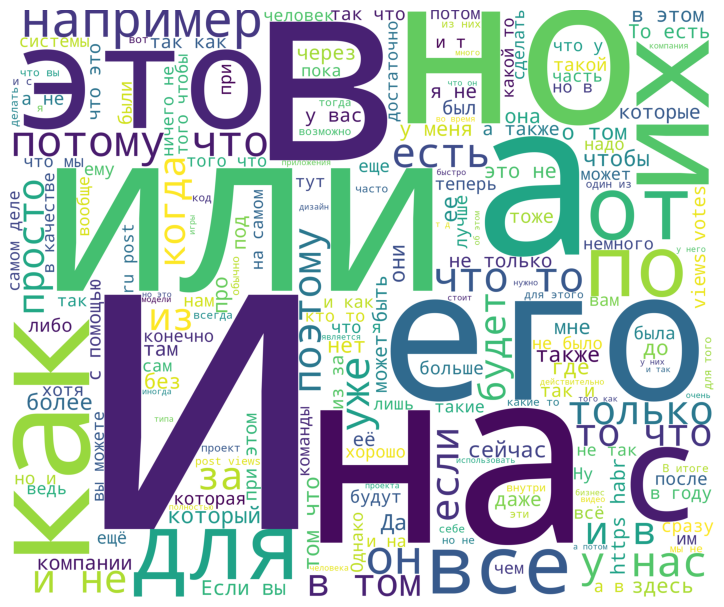

In [85]:
corpus = get_corpus(df['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

##### Облако слов, после обработки текста

<Axes: >

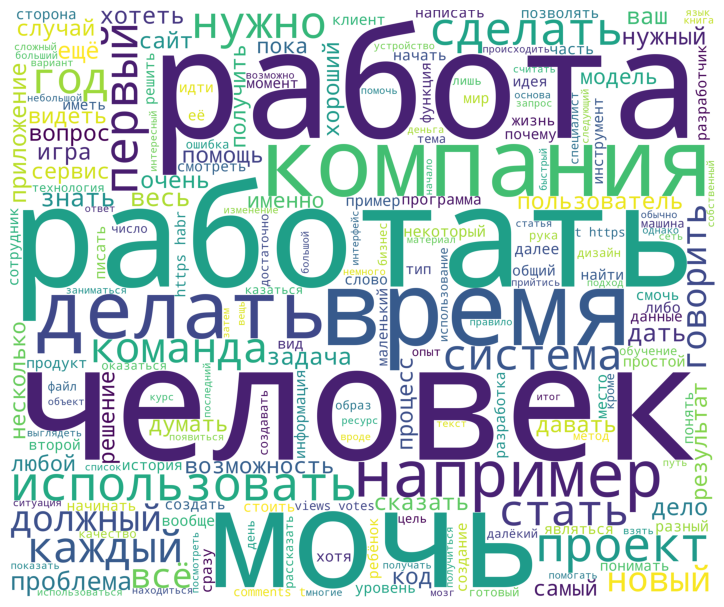

In [87]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

Облако слов отдельных текстов

In [89]:
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

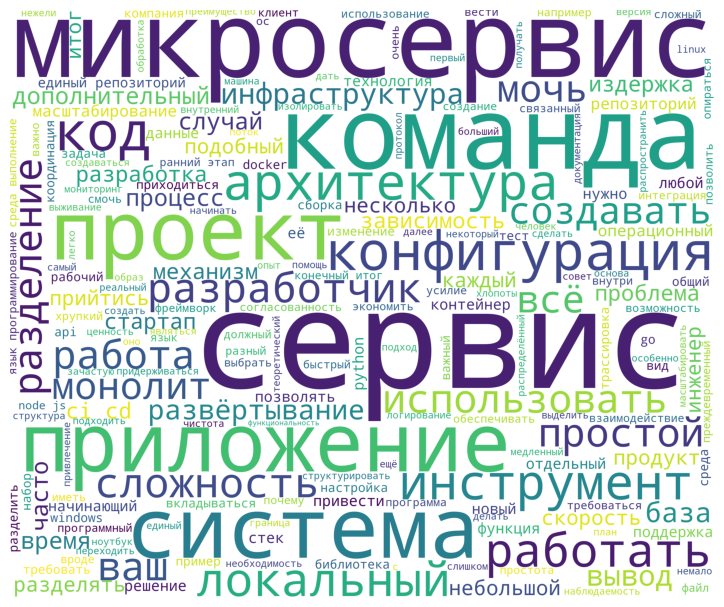

In [90]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

<Axes: >

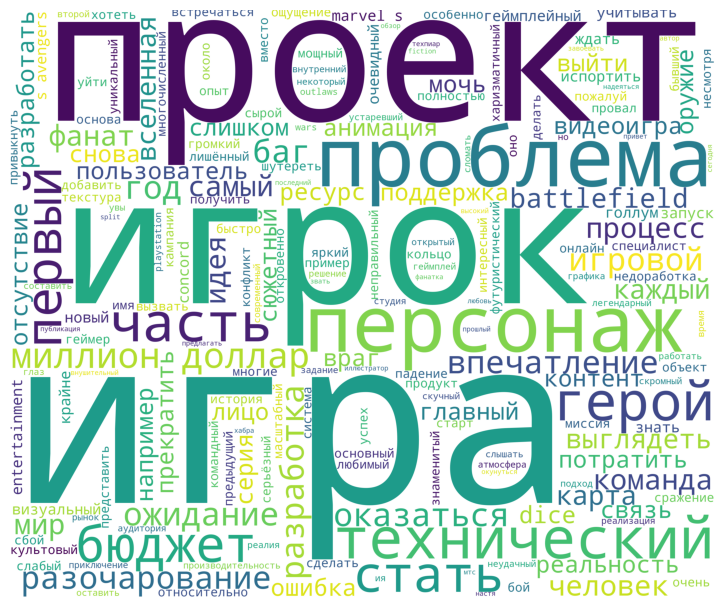

In [91]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

<Axes: >

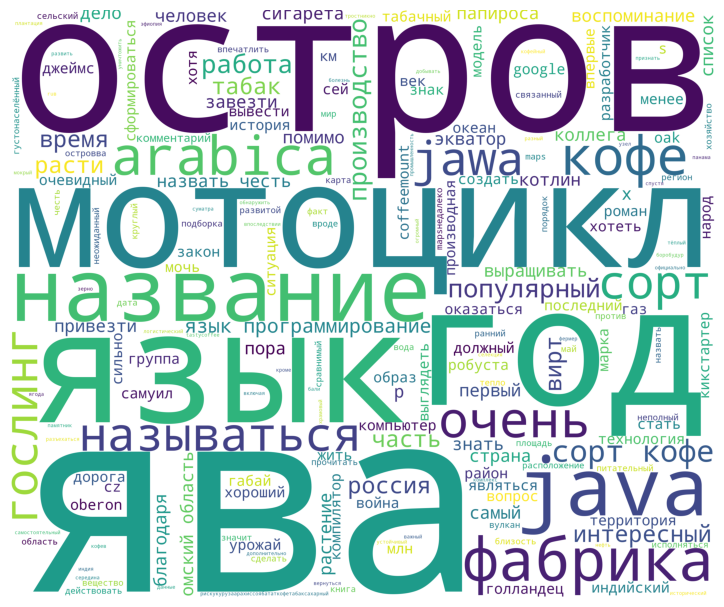

In [92]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

### 6. Векторизация текстовых данных

Bag of words

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [152]:
print(vectorizer.vocabulary_)

{'выживание': 30021, 'стартап': 69863, 'зависеть': 36049, 'насколько': 48572, 'быстро': 27211, 'смочь': 68371, 'вносить': 28754, 'доработка': 34460, 'поставлять': 59128, 'новый': 50822, 'функция': 75877, 'обеспечивать': 51206, 'ценность': 76874, 'конечный': 41857, 'потребитель': 59336, 'весь': 27967, 'важный': 27331, 'роль': 65372, 'играть': 38212, 'выбрать': 29850, 'базовый': 25104, 'архитектура': 24617, 'кроме': 42943, 'оперативность': 52809, 'команда': 41510, 'напрямую': 48433, 'технологический': 71914, 'стек': 69958, 'использовать': 39514, 'язык': 79564, 'программирование': 61256, 'неудачный': 50423, 'особенно': 53384, 'база': 25090, 'незрелый': 49390, 'микросервис': 46297, 'сильно': 67305, 'подорвать': 57442, 'продуктивность': 61388, 'привести': 60276, 'срыву': 69695, 'план': 56498, 'выпуск': 30281, 'продукт': 61382, 'усвоить': 74377, 'всё': 29723, 'работать': 62825, 'новаторский': 50761, 'проект': 61425, 'начинающий': 48868, 'качество': 40478, 'программный': 61274, 'выбираться': 

In [154]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [156]:
count_matrix.shape

(1225, 268058)

In [159]:
vectorizer.get_feature_names_out()[45000:46000]

array(['выбирать второй вариант', 'выбирать высокий',
       'выбирать высокий класс', 'выбирать город', 'выбирать её',
       'выбирать жить', 'выбирать задание', 'выбирать задание самый',
       'выбирать именно', 'выбирать инструмент', 'выбирать использовать',
       'выбирать канал', 'выбирать канал замерять', 'выбирать кандидат',
       'выбирать карточка', 'выбирать качество', 'выбирать книга',
       'выбирать компания', 'выбирать конкретный', 'выбирать курс',
       'выбирать личный', 'выбирать любой', 'выбирать любой правило',
       'выбирать магазин', 'выбирать мелодия',
       'выбирать мелодия будильник', 'выбирать меню', 'выбирать место',
       'выбирать модель', 'выбирать мучительный',
       'выбирать мучительный умирать', 'выбирать наиболее',
       'выбирать начинать', 'выбирать несколько', 'выбирать новый',
       'выбирать нравиться', 'выбирать нужно', 'выбирать нужный',
       'выбирать оптимальный', 'выбирать отдельный', 'выбирать очень',
       'выбирать парамет

In [161]:
print(count_matrix)

  (0, 46041)	3
  (0, 231026)	8
  (0, 71837)	2
  (0, 124746)	1
  (0, 29458)	2
  (0, 221230)	4
  (0, 37771)	1
  (0, 65663)	4
  (0, 172334)	1
  (0, 132955)	6
  (0, 254043)	6
  (0, 135821)	4
  (0, 258101)	3
  (0, 99116)	5
  (0, 173273)	1
  (0, 33156)	2
  (0, 30201)	5
  (0, 206342)	1
  (0, 81044)	1
  (0, 45230)	4
  (0, 23565)	1
  (0, 22679)	14
  (0, 102371)	1
  (0, 142470)	1
  (0, 96225)	27
  :	:
  (1224, 26559)	1
  (1224, 111773)	1
  (1224, 203502)	1
  (1224, 125558)	1
  (1224, 186470)	1
  (1224, 137451)	1
  (1224, 184536)	1
  (1224, 125412)	1
  (1224, 267606)	1
  (1224, 240416)	1
  (1224, 160076)	1
  (1224, 231187)	1
  (1224, 56311)	1
  (1224, 232343)	1
  (1224, 143921)	1
  (1224, 254416)	1
  (1224, 254417)	1
  (1224, 122419)	1
  (1224, 164658)	1
  (1224, 14480)	1
  (1224, 235694)	1
  (1224, 173638)	1
  (1224, 89450)	1
  (1224, 192613)	1
  (1224, 3616)	1


In [163]:
vectorizer.get_feature_names_out()[96225]

'команда'

In [165]:
vectorizer.get_feature_names_out()[22679]

'архитектура'

TF-IDF

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=30000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [175]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 11.8 s
Wall time: 11.8 s


In [177]:
tfidf_matrix.shape

(1225, 12644)

In [179]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['about', 'academy', 'access', 'accessibility', 'action', 'actions',
       'active', 'add', 'address', 'adobe', 'advanced', 'after', 'agency',
       'agency проект', 'agency проект веб', 'agent', 'agile', 'ai',
       'aic', 'air', 'airbnb', 'aka', 'al', 'all', 'alpha', 'amazon',
       'amd', 'an', 'analysis', 'analytics', 'and', 'android',
       'android ios', 'android разработка', 'android разработчик',
       'angular', 'any', 'apache', 'api', 'app', 'app store', 'append',
       'apple', 'application', 'apps', 'ar', 'architecture', 'arduino',
       'are', 'args', 'arm', 'array', 'art', 'as', 'async', 'at', 'audio',
       'auto', 'automation', 'avito', 'awesome', 'aws', 'azure', 'back',
       'backend', 'backend разработка', 'background', 'bad', 'badoo',
       'balance', 'balance platform', 'balance platform московский',
       'bar', 'base', 'based', 'bash', 'basic', 'be', 'before', 'best',
       'best practices', 'beta', 'between', 'beyond', 'beyond входящий',
     

In [185]:
tfidf_vectorizer.get_feature_names_out()[1329]

'база'

In [187]:
tfidf_vectorizer.get_feature_names_out()[2220]

'всё'

In [183]:
print(tfidf_matrix)

  (0, 10269)	0.016499454744847136
  (0, 933)	0.013516960448990032
  (0, 11767)	0.01565906845328743
  (0, 10274)	0.014661566787649322
  (0, 7347)	0.013303744285963485
  (0, 10104)	0.01669890514526949
  (0, 1659)	0.014999037218089291
  (0, 9291)	0.01596836723381408
  (0, 10492)	0.01669890514526949
  (0, 2238)	0.00990858342665748
  (0, 5961)	0.016499454744847136
  (0, 4584)	0.014556797140972098
  (0, 9981)	0.011266405928343312
  (0, 3185)	0.015377928488031807
  (0, 4739)	0.01565906845328743
  (0, 10268)	0.014770013303998642
  (0, 6786)	0.016499454744847136
  (0, 11443)	0.010994546476352859
  (0, 8753)	0.01691212130829604
  (0, 5069)	0.013826259229516684
  (0, 11019)	0.015377928488031807
  (0, 5950)	0.015377928488031807
  (0, 1657)	0.015377928488031807
  (0, 4129)	0.03299890948969427
  (0, 4645)	0.015246401889838525
  :	:
  (1224, 9491)	0.008759043104654677
  (1224, 9786)	0.04934163709025622
  (1224, 4424)	0.008691051061701918
  (1224, 8877)	0.02353618676739042
  (1224, 9273)	0.03918433213